# Project – Stability and Energy in Numerical Time-Stepping

## 📌 Overview
This project explores how different **time-integration methods** behave when applied to ODEs and PDEs.  
We focus on the **heat equation** (a diffusion PDE) and the **harmonic oscillator** (a conservative ODE system), using both explicit and implicit Euler schemes.  
The study highlights convergence, stability thresholds, and energy behavior.

---

## 🧮 Problems Studied

### 1. Heat Equation with Finite Elements
We consider the heat equation:

$$
u_t - \Delta u = 0, \quad x \in \Omega, \, t>0,
$$

with appropriate boundary and initial conditions.

- **Spatial discretization:** Piecewise linear finite elements (FEM).  
- **Time discretization:**  
  - Implicit Euler → unconditionally stable.  
  - Explicit Euler → stable only under a CFL-type condition.  
- **Validation:** Compared against the exact solution, measuring errors in the discrete $L^2$ norm.  

---

### 2. Heat Equation with Explicit Euler
- Repeated the FEM discretization but applied **explicit Euler** in time.  
- Stability condition depends on the largest eigenvalue $\lambda_{\max}$ of the stiffness-mass matrix system:  

$$
\tau \leq \frac{2}{\lambda_{\max}}
$$

where $\tau$ is the time step.  
- Experiments:  
  - For $\tau$ below threshold → stable solution.  
  - For $\tau$ above threshold → numerical blow-up.

---

### 3. Harmonic Oscillator
We also study the ODE system:

$$
y''(t) + y(t) = 0, \quad y(0)=1, \, y'(0)=0,
$$

with exact solution $y(t)=\cos(t)$.

- Tested explicit vs implicit Euler.  
- Measured **energy behavior**:  
  - Explicit Euler → energy grows artificially (unstable for oscillations).  
  - Implicit Euler → energy decays artificially (overly damped).  
- Demonstrated that neither scheme preserves true oscillatory energy, motivating the use of symplectic methods.

---

## 📊 Results
- **Heat equation:** implicit Euler converged as expected with first-order accuracy in time.  
- **Explicit Euler:** stable only for sufficiently small step sizes; instability observed otherwise.  
- **Harmonic oscillator:** both Euler methods distorted energy — explicit blows up, implicit overdamps.  
- Highlighted that more advanced integrators (Crank–Nicolson, symplectic Euler, RK methods) are better suited for long-term energy conservation.  



---

## ✅ Key Takeaways
- Stability is as important as accuracy in numerical time integration.  
- Explicit methods are efficient but require restrictive step sizes.  
- Implicit methods are stable for large steps but may introduce artificial damping.  
- Energy analysis of oscillatory systems reveals the need for specialized schemes (e.g. symplectic integrators).  


this is X 
 [[-5. -4. -3. -2. -1.  0.  1.]
 [-5. -4. -3. -2. -1.  0.  1.]
 [-5. -4. -3. -2. -1.  0.  1.]
 [-5. -4. -3. -2. -1.  0.  1.]
 [-5. -4. -3. -2. -1.  0.  1.]
 [-5. -4. -3. -2. -1.  0.  1.]
 [-5. -4. -3. -2. -1.  0.  1.]]

this is Y 
 [[-3. -3. -3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.  3.]]


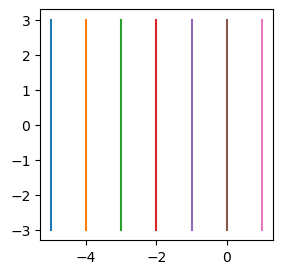

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a, b = -5, 1
c, d = -3, 3
N = 7

x = np.linspace(a, b, N)
y = np.linspace(c, d, N)

X, Y = np.meshgrid(x, y)
print("this is X \n", X)
print("\nthis is Y \n", Y)

plt.figure(figsize=(3,3))
plt.plot(X, Y) # Matplotlib treats each row of X and Y as one separate (x,y)-line to draw
plt.show()


this is Z
 [[-5.  -3.j   -4.88-3.j   -4.76-3.j   ...  0.76-3.j    0.88-3.j
   1.  -3.j  ]
 [-5.  -2.88j -4.88-2.88j -4.76-2.88j ...  0.76-2.88j  0.88-2.88j
   1.  -2.88j]
 [-5.  -2.76j -4.88-2.76j -4.76-2.76j ...  0.76-2.76j  0.88-2.76j
   1.  -2.76j]
 ...
 [-5.  +2.76j -4.88+2.76j -4.76+2.76j ...  0.76+2.76j  0.88+2.76j
   1.  +2.76j]
 [-5.  +2.88j -4.88+2.88j -4.76+2.88j ...  0.76+2.88j  0.88+2.88j
   1.  +2.88j]
 [-5.  +3.j   -4.88+3.j   -4.76+3.j   ...  0.76+3.j    0.88+3.j
   1.  +3.j  ]]

this is RZ
 [[-4.-3.j -4.-3.j -4.-3.j ...  2.-3.j  2.-3.j  2.-3.j]
 [-4.-3.j -4.-3.j -4.-3.j ...  2.-3.j  2.-3.j  2.-3.j]
 [-4.-3.j -4.-3.j -4.-3.j ...  2.-3.j  2.-3.j  2.-3.j]
 ...
 [-4.+3.j -4.+3.j -4.+3.j ...  2.+3.j  2.+3.j  2.+3.j]
 [-4.+3.j -4.+3.j -4.+3.j ...  2.+3.j  2.+3.j  2.+3.j]
 [-4.+3.j -4.+3.j -4.+3.j ...  2.+3.j  2.+3.j  2.+3.j]]

python actually recognizes -4.76+3.j this as a complex value and finds its norm
this is stable 2d array, it has the same shape as X Y meshgrid
 [[False

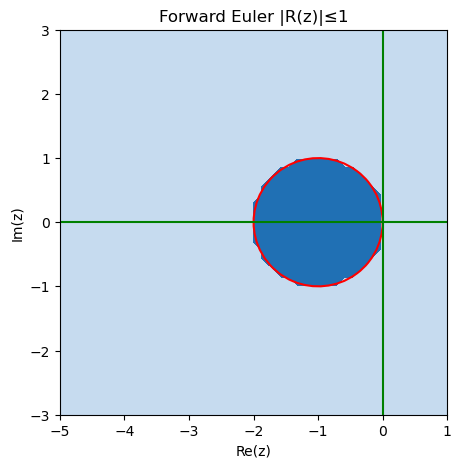

In [2]:
def R_euler(z):
    return 1 + z

N = 50
a, b = -5, 1
c, d = -3, 3

x = np.linspace(a, b, N)
y = np.linspace(c, d, N)
X, Y = np.meshgrid(x, y)

# building complex number
Z = X + 1j*Y
Z1 = np.round(Z, 2)   # rounds both real and imag parts to 1 decimal
print("this is Z\n", Z1)

RZ = R_euler(Z)
RZ1 = np.round(RZ, 0)   # rounds both real and imag parts to 1 decimal
print("\nthis is RZ\n", RZ1)

stable = np.abs(RZ) <= 1 
print("\npython actually recognizes -4.76+3.j this as a complex value and finds its norm")
print("this is stable 2d array, it has the same shape as X Y meshgrid\n",stable)


# PLOTTING
plt.figure(figsize=(5,5))
plt.contourf(X, Y, stable, cmap='Blues')
plt.contour (X, Y, np.abs(RZ), levels=[1], colors='red')

plt.axhline(0, color='green')
plt.axvline(0, color='green')

plt.title('Forward Euler |R(z)|≤1')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()


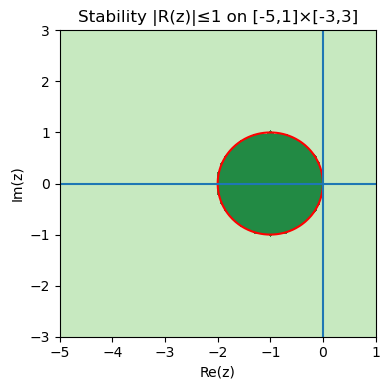

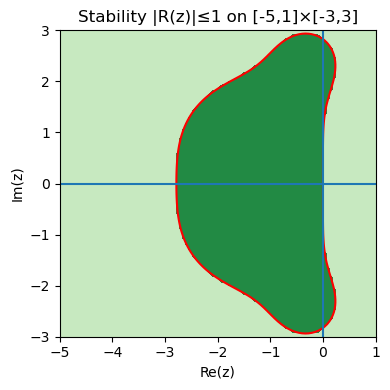

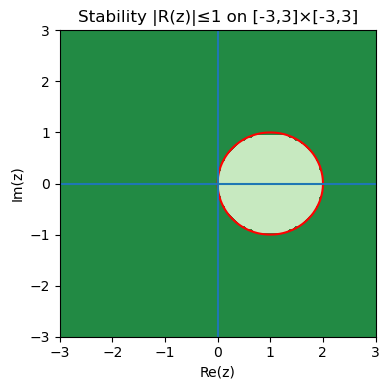

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stability(R, a, b, c, d, N=50, cmap='Greens'):

    x = np.linspace(a, b, N)
    y = np.linspace(c, d, N)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    RZ = R(Z)
    stable = np.abs(RZ) <= 1

    plt.figure(figsize=(4,4))
    plt.contourf(X, Y, stable, cmap=cmap)
    plt.contour (X, Y, np.abs(RZ), levels=[1], colors='red')
    plt.axhline(0)
    plt.axvline(0)
    plt.title(f'Stability |R(z)|≤1 on [{a},{b}]×[{c},{d}]')
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.tight_layout()
    plt.show()
    
def R_euler(z):      return 1 + z
def R_rk4(z):        return 1 + z + z**2/2 + z**3/6 + z**4/24
def R_imp_euler(z):
    return 1 / (1 - z)

plot_stability(R_euler, a=-5, b=1, c=-3, d=3, N=100)
plot_stability(R_rk4,   a=-5, b=1, c=-3, d=3, N=100)
plot_stability(R_imp_euler, a=-3, b=3, c=-3, d=3, N=100)


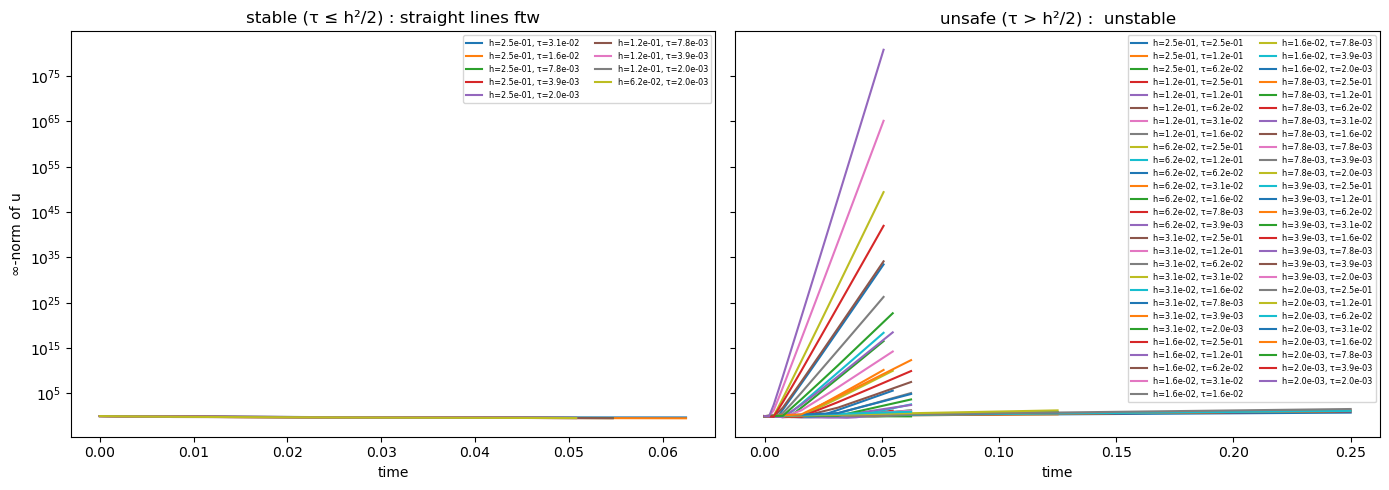

In [4]:
# heat_equation_explicit_euler.py
#
# quick ver for exercise 29 (part b)
# we solve  u_t = u_xx  on x in [0,1], t in [0, T]
# dirichlet ends are frozen at zero, source term is zero
# spatial grid width is h, time step is tau
# explicit euler is stable only if  tau <= h^2 / 2  (proved in part a)
# here we loop over h’s and tau’s and observe the sup‑norm 

import numpy as np
import matplotlib.pyplot as plt


# --- helper: initial hump ---------------------------------------------------
def g(x):
    """
    gaussian bump centered at 0.5
    g(x) = exp(-30 * (x - 0.5)^2)
    """
    return np.exp(-30.0 * (x - 0.5) ** 2)


# --- explicit euler time‑marcher -------------------------------------------
def explicit_euler_heat(h, tau, T=0.1):
    # number of interior points: nodes 1…N‑1 live inside (0,1)
    N_int = int(1 / h) - 1
    x = np.linspace(0.0, 1.0, N_int + 2)       # include boundaries
    u = g(x)                                   # slap on the initial data
    u[0] = 0.0                                 # enforce u(0, t) = 0
    u[-1] = 0.0                                # enforce u(1, t) = 0

    alpha = tau / h ** 2                       # lmit
    n_steps = int(np.ceil(T / tau))            # how many time steps?
    
    sup = np.empty(n_steps + 1)                # create an n+1 np array
    sup[0] = np.linalg.norm(u, np.inf)   #  maximum absolute value in u

    # update interior nodes with the explicit‑Euler formula
    # u_new = u_old + (tau / h^2) * (u_{i-1} - 2u_i + u_{i+1})

    for n in range(1, n_steps + 1):            # step through t = n·tau, n = 1…N
        u[1:-1] = u[1:-1] + alpha * (u[:-2] - 2.0 * u[1:-1] + u[2:])

        # grab the current inf norm (max abs value) for future plotting / judging
        sup[n] = np.linalg.norm(u, np.inf)

    # build a matching time axis so the plot has an x‑coordinate to stand on
    t = np.linspace(0.0, n_steps * tau, n_steps + 1)
    return t, sup # times array, sup norms list



# ---  (h, tau) combos --------------------------------------
def run_experiment():
    """
    loops h, τ on dyadic grids;
    curves in two buckets: stable vs unstable.
    finally draw two semilog plots.
    """

    T = 0.05                                    # short horizon: blow‑ups are fast
    hs   = [2 ** -k for k in range(2, 10)]      # 0.25 … 9.77e‑4  (skip h=0.5: too coarse)
    taus = [2 ** -k for k in range(2, 10)]      # same idea

    stable   = {}       # (h, τ) → (t, sup)
    unstable = {}

    for h in hs:
        for tau in taus:
            t, sup = explicit_euler_heat(h, tau, T)
            if tau <= h**2 / 2.0:
                stable[(h, tau)] = (t, sup)
            else:
                unstable[(h, tau)] = (t, sup)

    # ------------- plotting: two panels ------------------------------------
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # stable side
    ax = axes[0]
    for (h, tau), (t, sup) in stable.items():
        ax.plot(t, sup, label=f"h={h:.1e}, τ={tau:.1e}")
    ax.set_yscale("log")
    ax.set_xlabel("time")
    ax.set_ylabel("∞‑norm of u")
    ax.set_title("stable (τ ≤ h²/2) : straight lines ftw")
    ax.legend(fontsize="xx-small", ncol=2)

    # unstable side
    ax = axes[1]
    for (h, tau), (t, sup) in unstable.items():
        ax.plot(t, sup, label=f"h={h:.1e}, τ={tau:.1e}")
    ax.set_yscale("log")
    ax.set_xlabel("time")
    ax.set_title("unsafe (τ > h²/2) :  unstable")
    ax.legend(fontsize="xx-small", ncol=2)

    plt.tight_layout()
    plt.show()


# --- go time ----------------------------------------------------------------
if __name__ == "__main__":
    run_experiment()


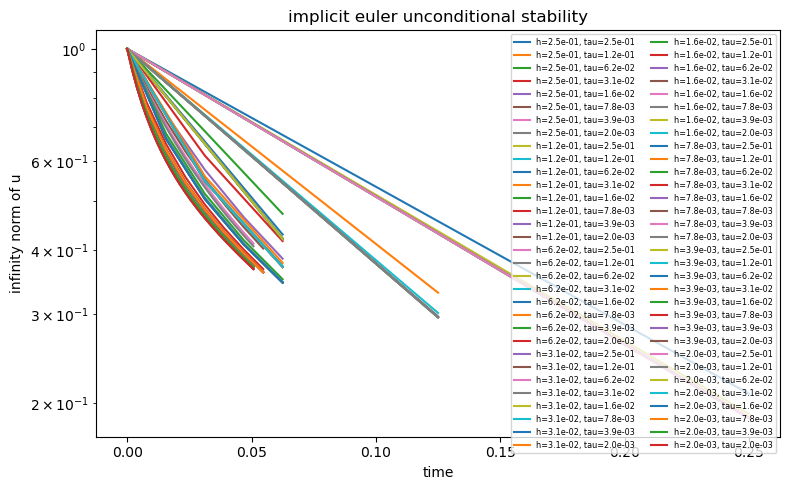

In [5]:
# implicit only version for heat_equation_explicit_euler.py

from scipy.linalg import lu_factor, lu_solve

def implicit_euler_heat(h, tau, T=0.05):
    # backward euler march for u t equals u xx on the interval zero to one
    # recreate the same grid as the explicit solver
    N_int = int(1 / h) - 1
    x = np.linspace(0.0, 1.0, N_int + 2) # set initial data on grid
    u = g(x)
    u[0] = u[-1] = 0.0

    # build the interior laplacian matrix
    main = -2.0 * np.ones(N_int)
    off  =  1.0 * np.ones(N_int - 1)
    L = np.diag(main) + np.diag(off, 1) + np.diag(off, -1)

    A = np.eye(N_int) - (tau / h**2) * L # form the system matrix for backward euler
    lu, piv = lu_factor(A) # perform an lu factorization once up front

    n_steps = int(np.ceil(T / tau)) 
    sup_imp = np.empty(n_steps + 1) # array for max norm
    sup_imp[0] = np.linalg.norm(u, np.inf) # initial max norm at time zero

    # time stepping loop
    for n in range(1, n_steps + 1):
        u[1:-1] = lu_solve((lu, piv), u[1:-1]) # solve the linear system for interior values
        sup_imp[n] = np.linalg.norm(u, np.inf) # compute the infinity norm of the solution

    # build time axis matching the number of steps
    t = np.linspace(0.0, n_steps * tau, n_steps + 1)
    return t, sup_imp

def run_implicit_only():
    # setting params
    T = 0.05
    hs   = [2 ** -k for k in range(2, 10)]
    taus = [2 ** -k for k in range(2, 10)]

    # collect implicit euler results
    implicit = {}
    for h in hs:
        for tau in taus:
            # get times and max norms for this pair
            t_imp, sup_imp = implicit_euler_heat(h, tau, T)
            implicit[(h, tau)] = (t_imp, sup_imp)

    # plot all implicit euler decay curves in one semilog figure
    plt.figure(figsize=(8, 5))
    for (h, tau), (t, sup) in implicit.items():
        plt.plot(t, sup, label=f"h={h:.1e}, tau={tau:.1e}")
    plt.yscale("log")
    plt.xlabel("time")
    plt.ylabel("infinity norm of u")
    plt.title("implicit euler unconditional stability")
    plt.legend(fontsize="xx-small", ncol=2)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    run_implicit_only()
